### 비지도 학습

In [4]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap']="gray"

In [6]:
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')

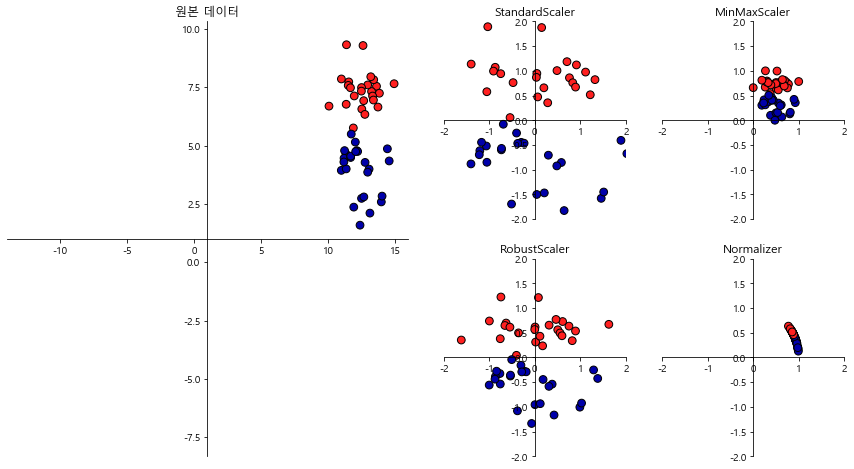

In [7]:
mglearn.plots.plot_scaling()

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [10]:
# MinMaxScaler 사용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.39 , 0.707, 0.412, ..., 0.81 , 0.6  , 0.918],
       [0.378, 0.318, 0.368, ..., 0.512, 0.332, 0.316],
       [0.364, 0.352, 0.352, ..., 0.553, 0.348, 0.289],
       ...,
       [0.484, 0.501, 0.487, ..., 0.653, 0.415, 0.843],
       [0.334, 0.39 , 0.318, ..., 0.274, 0.157, 0.224],
       [0.286, 0.295, 0.268, ..., 0.172, 0.1  , 0.069]])

In [19]:
# StandardScaler 사용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

### 주성분 분석(PCA)

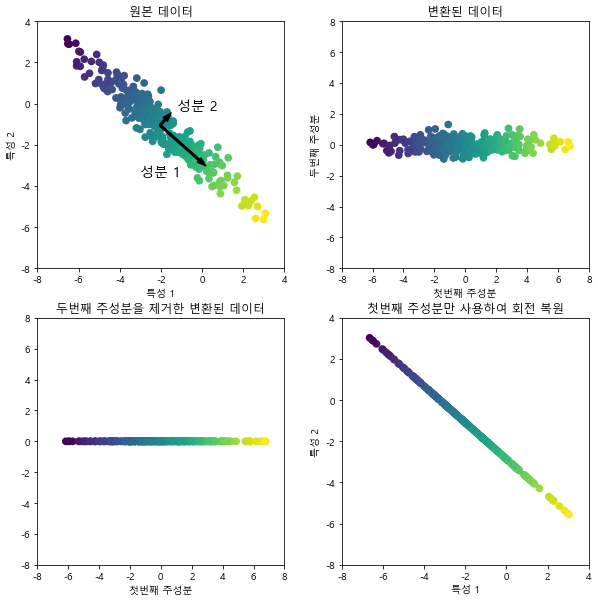

In [23]:
mglearn.plots.plot_pca_illustration()

#### PCA 적용해 유방암 데이터셋 시각화하기

In [27]:
import matplotlib.pyplot as plt
import numpy as np

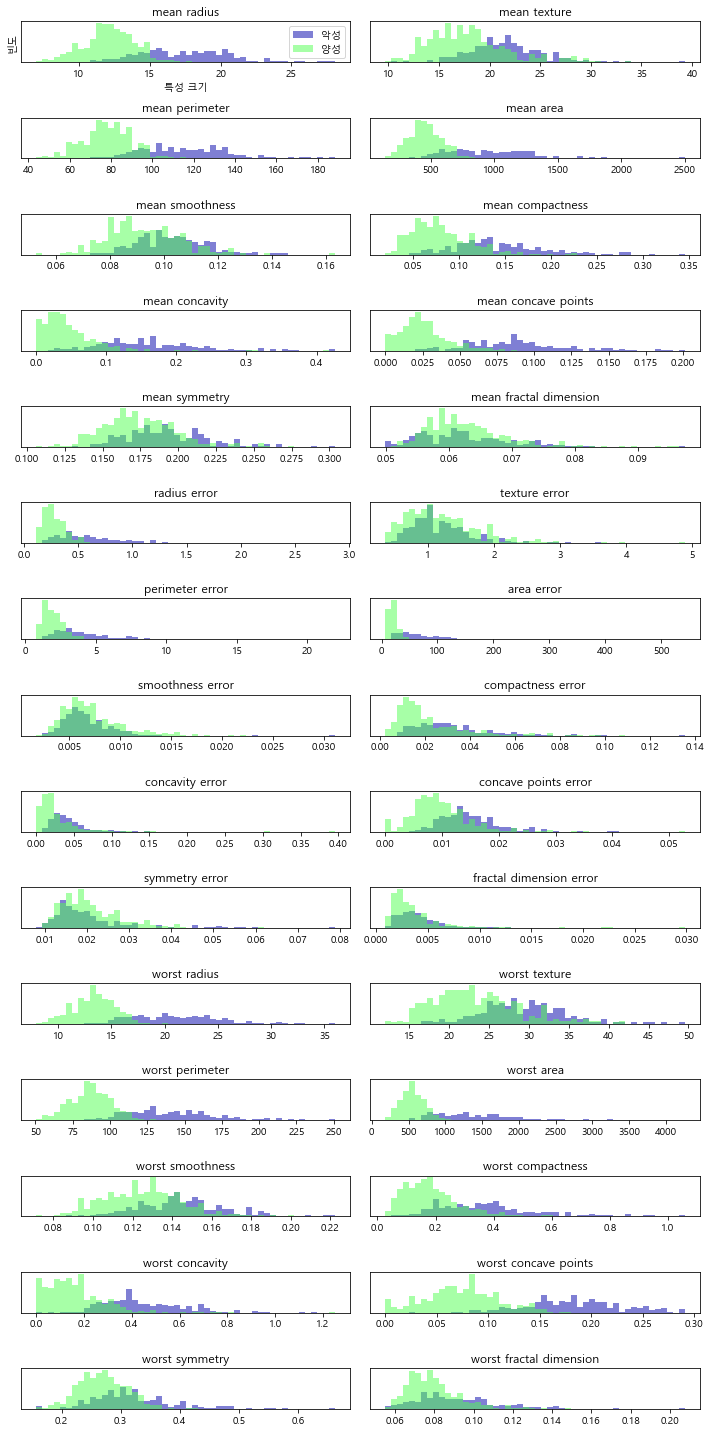

In [26]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel() # list로 받기

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50) # bin: 구간별
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [29]:
from sklearn.decomposition import PCA

# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)

# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

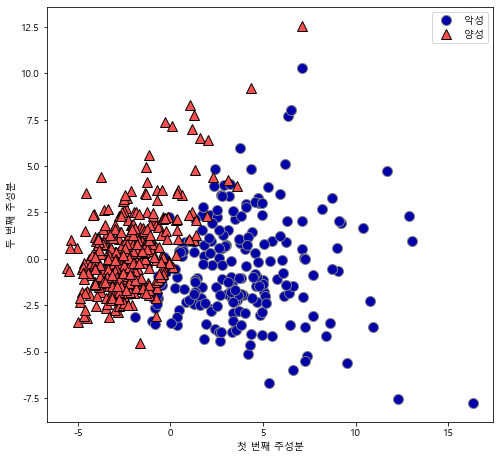

In [30]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [31]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [32]:
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0, 0.5, '주성분')

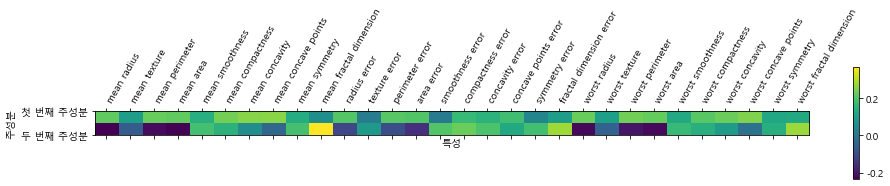

In [33]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

#### 고유 얼굴 특성 추출

In [40]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [45]:
image_shape = people.images[0].shape
image_shape # 하나의 이미지 픽셀 정보

(87, 65)

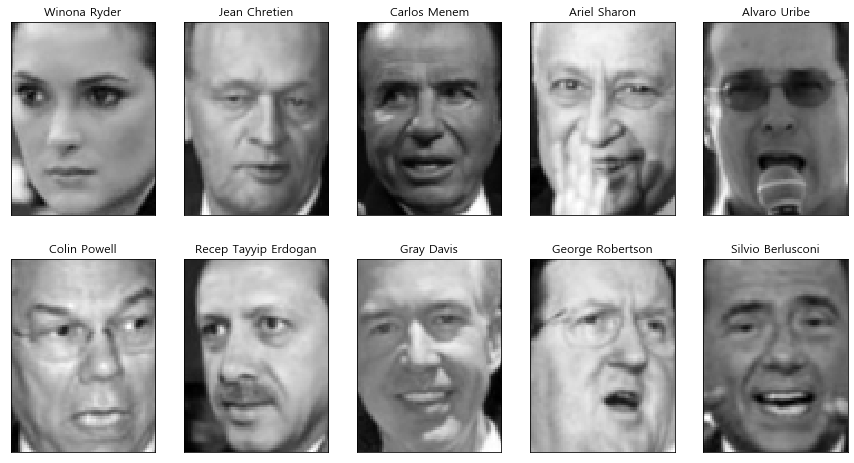

In [41]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [42]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
       dtype='<U25'))

In [43]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [46]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [51]:
people.target.shape

(3023,)

In [59]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    # where (code가 TRUE일때) # 편중을 없애기 위해 사람마다 50개만 추출
    
X_people = people.data[mask]
y_people = people.target[mask]

In [60]:
X_people

array([[ 57.   ,  60.333,  78.   , ...,  17.333,  16.667,  22.667],
       [ 66.667,  80.667,  88.667, ...,   8.667,   8.333,   9.333],
       [ 18.667,  14.333,  15.   , ...,  22.667,  22.667,  25.667],
       ...,
       [ 36.333,  22.333,  28.   , ...,  14.333,   6.667,   5.333],
       [ 54.   ,  65.333,  56.333, ..., 209.667, 210.   , 212.333],
       [110.667, 128.333, 145.333, ...,  14.   ,  14.   ,  13.667]],
      dtype=float32)

In [61]:
# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255

In [62]:
X_people

array([[0.224, 0.237, 0.306, ..., 0.068, 0.065, 0.089],
       [0.261, 0.316, 0.348, ..., 0.034, 0.033, 0.037],
       [0.073, 0.056, 0.059, ..., 0.089, 0.089, 0.101],
       ...,
       [0.142, 0.088, 0.11 , ..., 0.056, 0.026, 0.021],
       [0.212, 0.256, 0.221, ..., 0.822, 0.824, 0.833],
       [0.434, 0.503, 0.57 , ..., 0.055, 0.055, 0.054]], dtype=float32)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


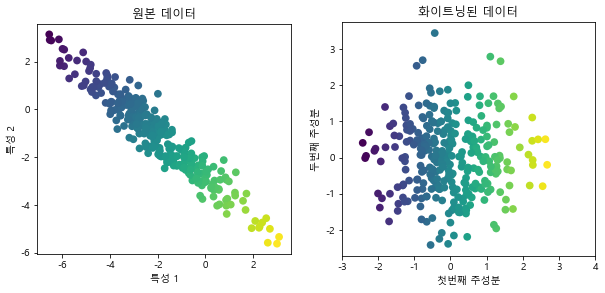

In [64]:
mglearn.plots.plot_pca_whitening()

In [65]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [66]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [67]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


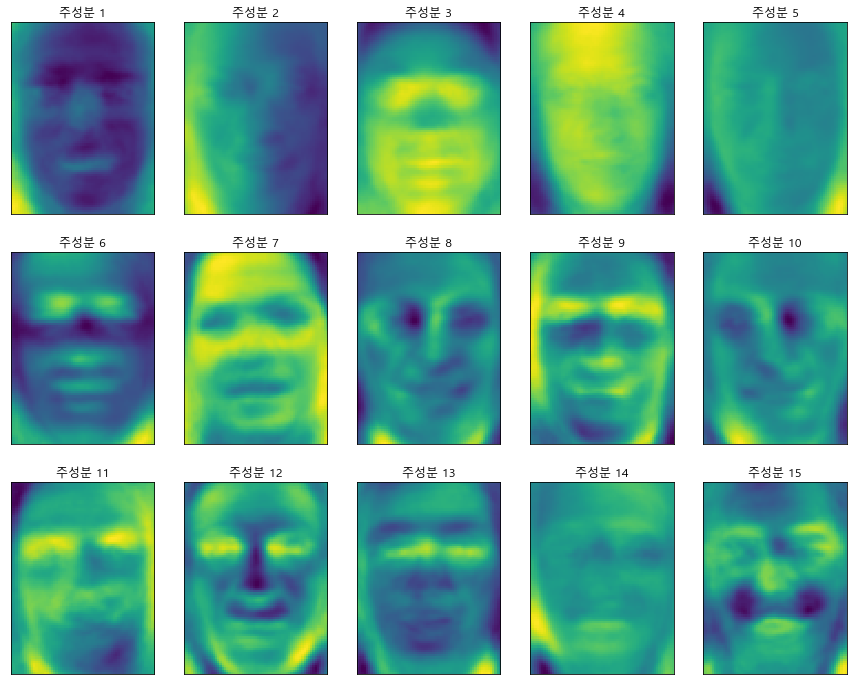

In [68]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))